<a href="https://colab.research.google.com/github/prithikaa74/Legal-Document-Summarizer-using-Streamlit/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Text Extraction from PDF

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
import PyPDF2


In [4]:
with open('/content/hedu_e_pn_2023_24.pdf', 'rb' ) as file:
    pdf_reader= PyPDF2.PdfReader(file)

    num_pages=len(pdf_reader.pages)
    print(f"Total Pages: {num_pages}")

    for page_num in range(num_pages):
        page = pdf_reader.pages[page_num]

        text=page.extract_text()
        print(f"Extract Text:{text} ")

Total Pages: 224
Extract Text:POLICY NOTE
2023 - 2024
DEMAND No. 20
Dr. K. PONMUDY
MINISTER FOR HIGHER EDUCATIONHIGHER EDUCATION DEPARTMENT
Government of Tamil Nadu
2023
Printed by Govt. Central Press, Chennai -  600 001. 
Extract Text: 
 HIGHER EDUCATION  DEPARTMENT  
POLICY NOTE  2023-24 
 
CONTENTS  
Sl. 
No. Headings  Pages  
1 Introduction  1–5 
2 Techn ical Education  7-42 
3 Collegiate Education  43–76 
4 Universities  77–151 
5 Tamil Nadu Archives and 
Historical Research  152–154 
6 Tamil Nadu State Council for 
Higher Educa tion 155–160 
7 State Project Directorate of 
Rashtriya Uchchatar Shiksha 
Abhiyan (RUSA)  161–170 
8 Science City  171–177 
9 Tami l Nadu Science and  
Technology Centre  178–184 
10 Tamil Nadu State Council for 
Science and Technology  185–194 
11 Tamil Nadu State Urdu 
Academy  195 
12 Tamil Nadu Stat e Council for 
Technical Education  196 
13 Tamil Nadu Unmanned Aerial 
Vehicles Corporation  197-199  
Extract Text: 
   
Extract Text: 
  POLICY NOTE  


## Generate text from image

In [5]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 13.4 MB/s eta 0:00:00


In [7]:
import easyocr
import cv2
import matplotlib.pyplot as plt

Text: It was the best of, Confidence: 0.9658044227820689
Text: times, it was the worst, Confidence: 0.8699979920837269
Text: of times, it was the age, Confidence: 0.7349637745627351
Text: of wisdom; it was the, Confidence: 0.8425616344866556
Text: age of foolishness ., Confidence: 0.8570522517331303


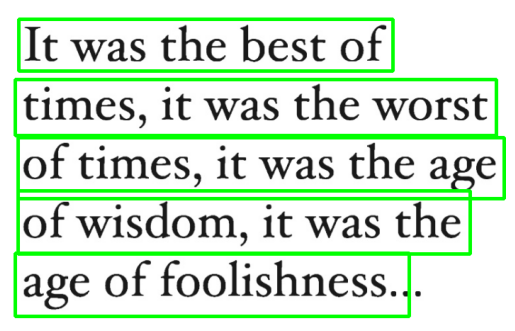

In [8]:
reader = easyocr.Reader(['en'])

image_path = '/content/image.png'
image = cv2.imread(image_path)

result = reader.readtext(image_path)

for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    confidence = detection[2]

    print(f'Text: {text}, Confidence: {confidence}')

    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## Text to Image Generator

In [15]:
!pip install pillow

In [16]:
from PIL import Image, ImageDraw, ImageFont

width, height = 400, 200

image = Image.new('RGB', (width, height), color='white')

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

text = "Horse"

bbox = draw.textbbox((0, 0), text, font=font)

text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]
position = ((width - text_width) // 2, (height - text_height) // 2)

draw.text(position, text, fill='black', font=font)

image.save('text_image.png')



## Bank Statement Generator

In [17]:
import re
from PyPDF2 import PdfReader
import pandas as pd

def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()

    return text

def extract_transactions(text):
    pattern = r'(\d{2}-\d{2}-\d{4})\s+([\w\s/\-@:.]+)\s+(-?\d{1,3}(?:,\d{3})*\.\d{2})\s+(-?\d{1,3}(?:,\d{3})*\.\d{2})'
    transactions = re.findall(pattern, text)

    df = pd.DataFrame(transactions, columns=['Date', 'Description', 'Amount', 'Balance'])

    df['Amount'] = df['Amount'].str.replace(',', '').astype(float)
    df['Balance'] = df['Balance'].str.replace(',', '').astype(float)

    return df

pdf_path = '/content/Date Particulars Withdrawals Deposits Balance.pdf'

pdf_text = extract_text_from_pdf(pdf_path)

df_transactions = extract_transactions(pdf_text)

print(df_transactions)


         Date                                        Description    Amount  \
0  06-09-2024      UPI/DR/461674800459/ALICE BLU/HDFC Bank        45000.00   
1  06-09-2024       UPI/DR/461666503360/ZOMATO                      247.22   
2  07-09-2024  UPI/CR/425165327361/GOOGLE IN                 ...     24.00   
3  07-09-2024       UPI/DR/425139627310/COGNIFYZ                    249.00   
4  08-09-2024       SHORT COLLECTION CHARGES                        472.00   
5  09-09-2024       UPI/DR/425334862856/ZOMATO                      186.38   

   Balance  
0  6492.24  
1  6245.02  
2  3960.42  
3  3936.42  
4  2468.42  
5  1769.82  
